In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)
# we have made the batch size 10 in order to show the whole batch at a time 
# There is one thing to notice when working with the data loader. 
#If shuffle=True, then the batch will be different each time a call to next occurs.

In [3]:
len(train_set)

60000

In [4]:
train_set.train_labels

/Users/ayushranjan/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [5]:
#as train_lable is renamed as tagets we can use targets wherevere we want to use train_labels
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
#If we want to see how many of each label exists in the dataset, we can use the PyTorch bincount() function like so:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [7]:
sample = next(iter(train_set))
len(sample)
#dataset contains image-label pairs

2

In [8]:
image , label = sample
#this can be done as sample[0] = image and sample[1] = label 

In [9]:
type(image)

torch.Tensor

In [10]:
type(label)

int

In [11]:
image.shape

torch.Size([1, 28, 28])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)#this sets the line width for python output that is printed to the console 

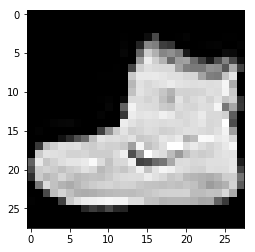

In [18]:
plt.imshow(image.squeeze(), cmap="gray")

In [19]:
 torch.tensor(label)
    # 9 signifies that it is a ankle-boot

tensor(9)

### Working with batches of data
    

In [22]:
batch = next(iter(train_loader))

In [23]:
len(batch)
#it has images and label list 

2

In [27]:
batch.shape
#this clears that it is infact a list 

AttributeError: 'list' object has no attribute 'shape'

In [28]:
images , labels = batch

In [29]:
images.shape
#10  gray images  of 28 * 28 size 

torch.Size([10, 1, 28, 28])

In [30]:
labels.shape
#since it has labels of 10 images so 10 labels 

torch.Size([10])

In [31]:
images[0].shape

torch.Size([1, 28, 28])

In [32]:
labels[0].shape

torch.Size([])

In [34]:
grid = torchvision.utils.make_grid(images, nrow=10)

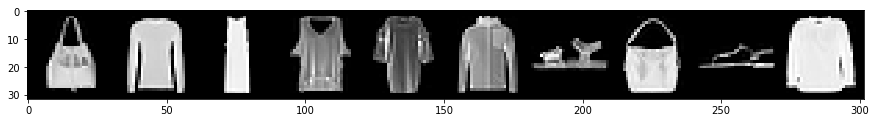

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [36]:
labels

tensor([8, 2, 3, 6, 3, 4, 5, 8, 5, 6])

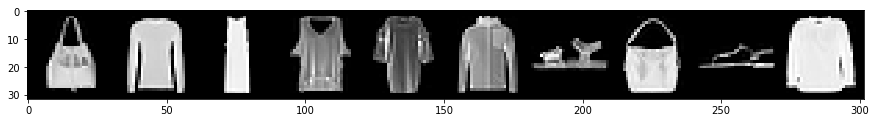

In [37]:
 #permute() PyTorch tensor method can be used in place of np.transpose(). It's like this:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))


### We should now have a good understanding of how to explore and interact with Datasets and DataLoaders. Both of these will prove to be important as we begin building our convolutional neural network and our training loop. In fact, the data loader will be used directly inside our training loop.